# SBA - Module 345 - Apache Spark (PySpark)


## Objective: 
In this skill-based assignment (SBA), you will analyze the dataset for the imaginary company, 
“CompanyABC,” using PySpark. The dataset is about stocks and sales, and you will be asked some basic questions about CompanyABC stock and sales data. 

Download datasets:  
CompanyABC stock.csv
Sales_February_2019.csv
Sales_April_2019.csv

You are free to utilize Python, Apache Spark RDD methods, SparkSQL Dataframe library, Spark SQL functional library, Python Pandas, Jupyter notebook and other supporting tools.

Technical Requirements:
 
Section One - CompanyABC Stock Data

1.1: Load/Read the CompanyABC Stock (CompanyABC stock.csv) data into SparkSQL Dataframe [ hint read() ].

●	After loading the data, you can inspect the data by using the lines of the code below:


In [3]:
# import necessary libraries

import pyspark
from pyspark.sql import SparkSession

# Start Spark Session
spark = SparkSession.builder.appName('SparkSBA').getOrCreate()

In [5]:
company_df = spark.read.csv('CompanyABC_stock.csv', header=True, inferSchema=True)
company_df.show(10)

+----------+------------------+------------------+------------------+------------------+--------+------------------+
|      Date|              Open|              High|               Low|             Close|  Volume|         Adj Close|
+----------+------------------+------------------+------------------+------------------+--------+------------------+
|2012-01-03|         59.970001|         61.060001|         59.869999|         60.330002|12668800|52.619234999999996|
|2012-01-04|60.209998999999996|         60.349998|         59.470001|59.709998999999996| 9593300|         52.078475|
|2012-01-05|         59.349998|         59.619999|         58.369999|         59.419998|12768200|         51.825539|
|2012-01-06|         59.419998|         59.450001|         58.869999|              59.0| 8069400|          51.45922|
|2012-01-09|         59.029999|         59.549999|         58.919998|             59.18| 6679300|51.616215000000004|
|2012-01-10|             59.43|59.709998999999996|             5

In [6]:
company_df.columns

['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']

In [7]:
company_df.printSchema()

root
 |-- Date: date (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: integer (nullable = true)
 |-- Adj Close: double (nullable = true)



In [9]:
company_df.describe().show()

+-------+------------------+-----------------+-----------------+-----------------+-----------------+-----------------+
|summary|              Open|             High|              Low|            Close|           Volume|        Adj Close|
+-------+------------------+-----------------+-----------------+-----------------+-----------------+-----------------+
|  count|              1258|             1258|             1258|             1258|             1258|             1258|
|   mean| 72.35785375357709|72.83938807631165| 71.9186009594594|72.38844998012726|8222093.481717011|67.23883848728146|
| stddev|  6.76809024470826|6.768186808159218|6.744075756255496|6.756859163732991|  4519780.8431556|6.722609449996857|
|    min|56.389998999999996|        57.060001|        56.299999|        56.419998|          2094900|        50.363689|
|    max|         90.800003|        90.970001|            89.25|        90.470001|         80898100|84.91421600000001|
+-------+------------------+-----------------+--

In [56]:
company_df.show()

+----------+------------------+------------------+------------------+------------------+--------+------------------+
|      Date|              Open|              High|               Low|             Close|  Volume|         Adj Close|
+----------+------------------+------------------+------------------+------------------+--------+------------------+
|2012-01-03|         59.970001|         61.060001|         59.869999|         60.330002|12668800|52.619234999999996|
|2012-01-04|60.209998999999996|         60.349998|         59.470001|59.709998999999996| 9593300|         52.078475|
|2012-01-05|         59.349998|         59.619999|         58.369999|         59.419998|12768200|         51.825539|
|2012-01-06|         59.419998|         59.450001|         58.869999|              59.0| 8069400|          51.45922|
|2012-01-09|         59.029999|         59.549999|         58.919998|             59.18| 6679300|51.616215000000004|
|2012-01-10|             59.43|59.709998999999996|             5

## 1.2: Print out the first five rows.

In [55]:
company_df.show(5)

+----------+------------------+---------+---------+------------------+--------+------------------+
|      Date|              Open|     High|      Low|             Close|  Volume|         Adj Close|
+----------+------------------+---------+---------+------------------+--------+------------------+
|2012-01-03|         59.970001|61.060001|59.869999|         60.330002|12668800|52.619234999999996|
|2012-01-04|60.209998999999996|60.349998|59.470001|59.709998999999996| 9593300|         52.078475|
|2012-01-05|         59.349998|59.619999|58.369999|         59.419998|12768200|         51.825539|
|2012-01-06|         59.419998|59.450001|58.869999|              59.0| 8069400|          51.45922|
|2012-01-09|         59.029999|59.549999|58.919998|             59.18| 6679300|51.616215000000004|
+----------+------------------+---------+---------+------------------+--------+------------------+
only showing top 5 rows



In [12]:
company_df.head(5)

[Row(Date=datetime.date(2012, 1, 3), Open=59.970001, High=61.060001, Low=59.869999, Close=60.330002, Volume=12668800, Adj Close=52.619234999999996),
 Row(Date=datetime.date(2012, 1, 4), Open=60.209998999999996, High=60.349998, Low=59.470001, Close=59.709998999999996, Volume=9593300, Adj Close=52.078475),
 Row(Date=datetime.date(2012, 1, 5), Open=59.349998, High=59.619999, Low=58.369999, Close=59.419998, Volume=12768200, Adj Close=51.825539),
 Row(Date=datetime.date(2012, 1, 6), Open=59.419998, High=59.450001, Low=58.869999, Close=59.0, Volume=8069400, Adj Close=51.45922),
 Row(Date=datetime.date(2012, 1, 9), Open=59.029999, High=59.549999, Low=58.919998, Close=59.18, Volume=6679300, Adj Close=51.616215000000004)]

### 1.3: Create a new Dataframe column called “HV Ratio,” which will stimulate the ratio of the High price versus the total Volume of stock that was traded for a day. 

In [54]:
company_df_HVR = company_df.withColumn('HV Ratio', company_df['High']/company_df['Volume'])
company_df_HVR.show()

+----------+------------------+------------------+------------------+------------------+--------+------------------+--------------------+
|      Date|              Open|              High|               Low|             Close|  Volume|         Adj Close|            HV Ratio|
+----------+------------------+------------------+------------------+------------------+--------+------------------+--------------------+
|2012-01-03|         59.970001|         61.060001|         59.869999|         60.330002|12668800|52.619234999999996|4.819714653321546E-6|
|2012-01-04|60.209998999999996|         60.349998|         59.470001|59.709998999999996| 9593300|         52.078475|6.290848613094555E-6|
|2012-01-05|         59.349998|         59.619999|         58.369999|         59.419998|12768200|         51.825539|4.669412994783916E-6|
|2012-01-06|         59.419998|         59.450001|         58.869999|              59.0| 8069400|          51.45922|7.367338463826307E-6|
|2012-01-09|         59.029999|   

### 1.4: Find out on what day the stock price was the highest. (Hint: use the High column.)

In [68]:
from pyspark.sql.functions import *

company_df_maxHigh = company_df.orderBy(desc('High')).limit(1)

company_df_maxHigh.show()



+----------+---------+---------+-----+---------+-------+---------+
|      Date|     Open|     High|  Low|    Close| Volume|Adj Close|
+----------+---------+---------+-----+---------+-------+---------+
|2015-01-13|90.800003|90.970001|88.93|89.309998|8215400|83.825448|
+----------+---------+---------+-----+---------+-------+---------+



### 1.5: What is the average (mean) closing price? (Hint: Use the Close column.)

In [70]:
company_df.select(avg('Close').alias('Avarage Closing Price')).show()

+---------------------+
|Avarage Closing Price|
+---------------------+
|    72.38844998012726|
+---------------------+



### 1.6: What is the maximum and minimum volume of stock traded? (Hint: Use the Volume column).

In [71]:
company_df.select(max('Volume'), min('Volume')).show()

+-----------+-----------+
|max(Volume)|min(Volume)|
+-----------+-----------+
|   80898100|    2094900|
+-----------+-----------+



### 1.7: For how many days was the closing value less than 70 dollars? (Hint: Use the count() method.)

In [78]:
close_less70 = company_df.filter(company_df.Close<70)
a =close_less70.count()
b = company_df.count()
print(f"Total out of {b} days, closing value was less than 70 dollars for {a} days.")

Total out of 1258 days, closing value was less than 70 dollars for 397 days.


### 1.8: What percentage of the time were the High greater than 80 dollars?
(Hint: (Number of Days High>80)/(Total Days in the dataset)]


In [82]:
high_more80 = company_df.filter(company_df.High > 80)
ratio = high_more80.count() / company_df.count()
print(f"{ratio} percents of the times High was greater than 80 dollars.")


0.09141494435612083 percents of the times High was greater than 80 dollars.


### 1.9: Create a database named CompanyABC_DB using SQL (Workbench).  

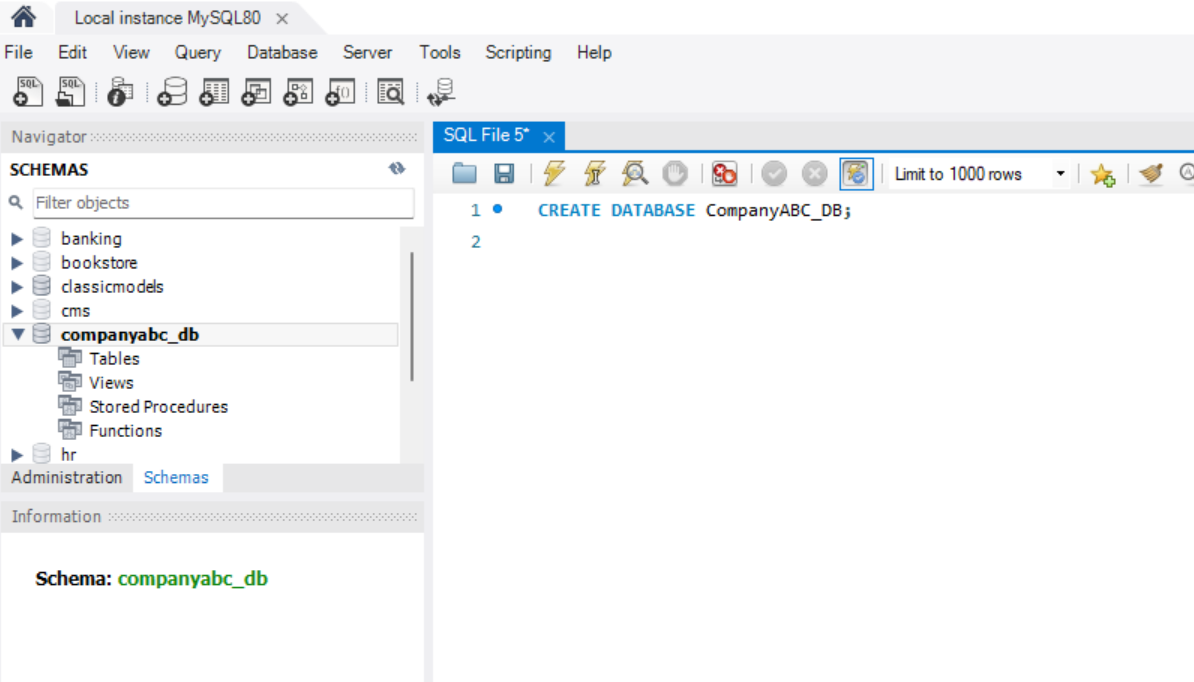

### 1.10: Load/Write CompanyABC stock.csv file data into CompanyABC_DB database from SparkSQL Dataframe. You can specify any table name for that file.

In [83]:


company_df.write.format("jdbc") \
  .mode("append") \
  .option("url", "jdbc:mysql://localhost:3306/companyabc_db") \
  .option("dbtable", "companyabc_db.stocksdata") \
  .option("user", "root") \
  .option("password", "Password") \
  .save()

## Section Two - CompanyABC Sales Data
2.1: Load/Read both CompanyABC sales datasets (Sales_April_2019.csv and Sales_February_2019.csv) into SparkSQL Dataframe ( hint read() ).

You can inspect data by using the lines below: 


In [85]:
feb_df = spark.read.csv('Sales_February_2019.csv', header=True, inferSchema=True)
feb_df.columns

['Order ID',
 'Product',
 'Quantity Ordered',
 'Price Each',
 'Order Date',
 'Purchase Address']

In [86]:
feb_df.printSchema()

root
 |-- Order ID: integer (nullable = true)
 |-- Product: string (nullable = true)
 |-- Quantity Ordered: integer (nullable = true)
 |-- Price Each: double (nullable = true)
 |-- Order Date: string (nullable = true)
 |-- Purchase Address: string (nullable = true)



In [87]:
feb_df.describe().show()

+-------+------------------+------------+------------------+------------------+--------------+--------------------+
|summary|          Order ID|     Product|  Quantity Ordered|        Price Each|    Order Date|    Purchase Address|
+-------+------------------+------------+------------------+------------------+--------------+--------------------+
|  count|             11986|       12004|             11986|             11986|         12004|               12004|
|   mean|156250.61338227932|        null|1.1230602369431002|182.74150675788204|          null|                null|
| stddev|3322.0752634362825|        null|0.4311103873526451|325.54329574605885|          null|                null|
|    min|            150502|20in Monitor|                 1|              2.99|02/01/19 01:51|1 Hill St, Boston...|
|    max|            162008|      iPhone|                 7|            1700.0|    Order Date|    Purchase Address|
+-------+------------------+------------+------------------+------------

In [88]:
feb_df.describe().show()

+-------+------------------+------------+------------------+------------------+--------------+--------------------+
|summary|          Order ID|     Product|  Quantity Ordered|        Price Each|    Order Date|    Purchase Address|
+-------+------------------+------------+------------------+------------------+--------------+--------------------+
|  count|             11986|       12004|             11986|             11986|         12004|               12004|
|   mean|156250.61338227932|        null|1.1230602369431002|182.74150675788204|          null|                null|
| stddev|3322.0752634362825|        null|0.4311103873526451|325.54329574605885|          null|                null|
|    min|            150502|20in Monitor|                 1|              2.99|02/01/19 01:51|1 Hill St, Boston...|
|    max|            162008|      iPhone|                 7|            1700.0|    Order Date|    Purchase Address|
+-------+------------------+------------+------------------+------------

In [89]:
feb_df.show()

+--------+--------------------+----------------+----------+--------------+--------------------+
|Order ID|             Product|Quantity Ordered|Price Each|    Order Date|    Purchase Address|
+--------+--------------------+----------------+----------+--------------+--------------------+
|  150502|              iPhone|               1|     700.0|02/18/19 01:35|866 Spruce St, Po...|
|  150503|AA Batteries (4-p...|               1|      3.84|02/13/19 07:24|18 13th St, San F...|
|  150504|27in 4K Gaming Mo...|               1|    389.99|02/18/19 09:46|52 6th St, New Yo...|
|  150505|Lightning Chargin...|               1|     14.95|02/02/19 16:47|129 Cherry St, At...|
|  150506|AA Batteries (4-p...|               2|      3.84|02/28/19 20:32|548 Lincoln St, S...|
|  150507|Lightning Chargin...|               1|     14.95|02/24/19 18:50|387 12th St, Aust...|
|  150508|AA Batteries (4-p...|               1|      3.84|02/21/19 19:26|622 Center St, Sa...|
|  150509|Apple Airpods Hea...|         

In [90]:
apr_df = spark.read.csv('Sales_April_2019.csv', header=True, inferSchema=True)
apr_df.columns

['Order ID',
 'Product',
 'Quantity Ordered',
 'Price Each',
 'Order Date',
 'Purchase Address']

In [91]:
apr_df.printSchema()

root
 |-- Order ID: integer (nullable = true)
 |-- Product: string (nullable = true)
 |-- Quantity Ordered: integer (nullable = true)
 |-- Price Each: double (nullable = true)
 |-- Order Date: string (nullable = true)
 |-- Purchase Address: string (nullable = true)



In [92]:
apr_df.describe().show()

+-------+------------------+------------+-------------------+------------------+--------------+--------------------+
|summary|          Order ID|     Product|   Quantity Ordered|        Price Each|    Order Date|    Purchase Address|
+-------+------------------+------------+-------------------+------------------+--------------+--------------------+
|  count|             18289|       18324|              18289|             18289|         18324|               18324|
|   mean|185328.81672043304|        null| 1.1246104215648751|184.43102630000277|          null|                null|
| stddev| 5061.520829296985|        null|0.43640973695741925| 330.9133771769665|          null|                null|
|    min|            176558|20in Monitor|                  1|              2.99|4/1/2019 10:00|1 14th St, New Yo...|
|    max|            194094|      iPhone|                  7|            1700.0|    Order Date|    Purchase Address|
+-------+------------------+------------+-------------------+---

In [93]:
apr_df.show()

+--------+--------------------+----------------+----------+---------------+--------------------+
|Order ID|             Product|Quantity Ordered|Price Each|     Order Date|    Purchase Address|
+--------+--------------------+----------------+----------+---------------+--------------------+
|  176558|USB-C Charging Cable|               2|     11.95| 4/19/2019 8:46|917 1st St, Dalla...|
|  176559|Bose SoundSport H...|               1|     99.99| 4/7/2019 22:30|682 Chestnut St, ...|
|  176560|        Google Phone|               1|     600.0|4/12/2019 14:38|669 Spruce St, Lo...|
|  176560|    Wired Headphones|               1|     11.99|4/12/2019 14:38|669 Spruce St, Lo...|
|  176561|    Wired Headphones|               1|     11.99| 4/30/2019 9:27|333 8th St, Los A...|
|  176562|USB-C Charging Cable|               1|     11.95|4/29/2019 13:03|381 Wilson St, Sa...|
|  176563|Bose SoundSport H...|               1|     99.99|  4/2/2019 7:46|668 Center St, Se...|
|  176564|USB-C Charging Cable

### 2.2. If you use the above command on the sales dataset, you will notice that each Order has “Price Each” and “Quantity Ordered” columns, but the “Total price” is missing. See below:


Now, create a new Dataframe column called “Total price” and find the “Total price” of the Order for both sales files as shown in the screenshot.

In [95]:
column_lst = ['Order ID','Total Price', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address']
feb_df_total = feb_df.withColumn('Total Price', feb_df['Price Each'] * feb_df['Quantity Ordered'])
feb_df_total = feb_df_total.select(column_lst)
feb_df_total.show()

+--------+-----------+--------------------+----------------+----------+--------------+--------------------+
|Order ID|Total Price|             Product|Quantity Ordered|Price Each|    Order Date|    Purchase Address|
+--------+-----------+--------------------+----------------+----------+--------------+--------------------+
|  150502|      700.0|              iPhone|               1|     700.0|02/18/19 01:35|866 Spruce St, Po...|
|  150503|       3.84|AA Batteries (4-p...|               1|      3.84|02/13/19 07:24|18 13th St, San F...|
|  150504|     389.99|27in 4K Gaming Mo...|               1|    389.99|02/18/19 09:46|52 6th St, New Yo...|
|  150505|      14.95|Lightning Chargin...|               1|     14.95|02/02/19 16:47|129 Cherry St, At...|
|  150506|       7.68|AA Batteries (4-p...|               2|      3.84|02/28/19 20:32|548 Lincoln St, S...|
|  150507|      14.95|Lightning Chargin...|               1|     14.95|02/24/19 18:50|387 12th St, Aust...|
|  150508|       3.84|AA Bat

In [96]:
column_lst = ['Order ID','Total Price', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address']
apr_df_total = apr_df.withColumn('Total Price', apr_df['Price Each'] * apr_df['Quantity Ordered'])
apr_df_total = apr_df_total.select(column_lst)
apr_df_total.show()

+--------+-----------+--------------------+----------------+----------+---------------+--------------------+
|Order ID|Total Price|             Product|Quantity Ordered|Price Each|     Order Date|    Purchase Address|
+--------+-----------+--------------------+----------------+----------+---------------+--------------------+
|  176558|       23.9|USB-C Charging Cable|               2|     11.95| 4/19/2019 8:46|917 1st St, Dalla...|
|  176559|      99.99|Bose SoundSport H...|               1|     99.99| 4/7/2019 22:30|682 Chestnut St, ...|
|  176560|      600.0|        Google Phone|               1|     600.0|4/12/2019 14:38|669 Spruce St, Lo...|
|  176560|      11.99|    Wired Headphones|               1|     11.99|4/12/2019 14:38|669 Spruce St, Lo...|
|  176561|      11.99|    Wired Headphones|               1|     11.99| 4/30/2019 9:27|333 8th St, Los A...|
|  176562|      11.95|USB-C Charging Cable|               1|     11.95|4/29/2019 13:03|381 Wilson St, Sa...|
|  176563|      99.

### 2.3: Load/Write sales data from SparkSQL Dataframe into CompanyABC_DB database. You can specify any name to the table. Remember “Total price” must be recorded. 
Your result will look similar /closer to the screenshot below

## Putting both file in same Table called 'Salesdata'

In [99]:
feb_df_total.write.format("jdbc") \
  .mode("append") \
  .option("url", "jdbc:mysql://localhost:3306/companyabc_db") \
  .option("dbtable", "companyabc_db.salesdata") \
  .option("user", "root") \
  .option("password", "Password") \
  .save()

In [100]:
apr_df_total.write.format("jdbc") \
  .mode("append") \
  .option("url", "jdbc:mysql://localhost:3306/companyabc_db") \
  .option("dbtable", "companyabc_db.salesdata") \
  .option("user", "root") \
  .option("password", "Password") \
  .save()